In [ ]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import argparse

In [ ]:
# construct the argument parse and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-o", "--output", required=True,
#help="path to the output loss/accuracy plot")
#args = vars(ap.parse_args())
# grab the MNIST dataset (if this is your first time using this
# dataset then the 11MB download may take a minute)
print("[INFO] accessing MNIST...")
((trainX, trainY), (testX, testY)) = mnist.load_data()
# each image in the MNIST dataset is represented as a 28x28x1
# image, but in order to apply a standard neural network we must
# first "flatten" the image to be simple list of 28x28=784 pixels
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))
# scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

[INFO] accessing MNIST...
11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

[INFO] training network...
Epoch 1/100
469/469 [==============================] - 6s 9ms/step - loss: 2.2900 - accuracy: 0.1669 - val_loss: 2.2454 - val_accuracy: 0.2109
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 2.2127 - accuracy: 0.3870 - val_loss: 2.1709 - val_accuracy: 0.4747
Epoch 3/100
469/469 [==============================] - 4s 9ms/step - loss: 2.1279 - accuracy: 0.5403 - val_loss: 2.0683 - val_accuracy: 0.5908
Epoch 4/100
469/469 [==============================] - 5s 12ms/step - loss: 2.0059 - accuracy: 0.6131 - val_loss: 1.9191 - val_accuracy: 0.6724
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 1.8335 - accuracy: 0.6574 - val_loss: 1.7187 - val_accuracy: 0.6683
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 1.6202 - accuracy: 0.6919 - val_loss: 1.4926 - val_accuracy: 0.7152
Epoch 7/100
469/469 [==============================] - 4s 8ms/step - loss: 1.4007 - accuracy: 0.7248 - val_loss: 1

NameError: ignored

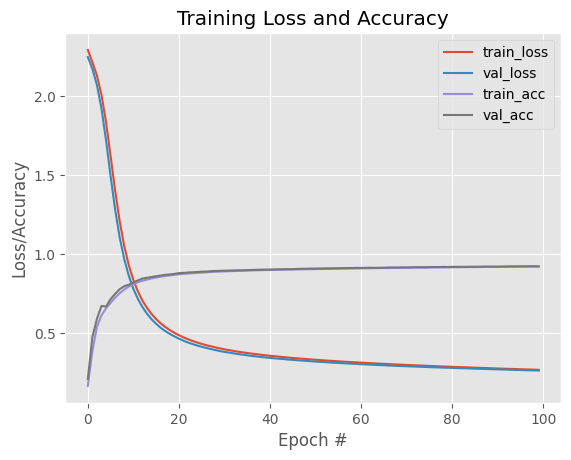

In [ ]:
# define the 784-256-128-10 architecture using Keras
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))
# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
epochs=100, batch_size=128)
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),
predictions.argmax(axis=1),
target_names=[str(x) for x in lb.classes_]))
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig(args["output"])